# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/Microsoft/microsoft-security-incident-prediction


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import math, numpy as np, pandas as pd, os, matplotlib.pyplot as plt, seaborn as sns, scipy.sparse as sp, joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
obesity_dataset = 'Obesity Prediction/Obesity prediction.csv'

try:
  obesity_df = pd.read_csv(obesity_dataset)
except FileNotFoundError:
  print(f"Error: File '{obesity_dataset}' not found.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file '{obesity_dataset}'. Check the file format and separator.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

In [3]:
obesity_df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Basic Informations

In [5]:
obesity_df.shape

(2111, 17)

In [6]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [7]:
for column in obesity_df.columns:
    print(f"Description of column '{column}':")
    print(obesity_df[column].describe())
    print("-" * 20)

Description of column 'Gender':
count     2111
unique       2
top       Male
freq      1068
Name: Gender, dtype: object
--------------------
Description of column 'Age':
count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64
--------------------
Description of column 'Height':
count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64
--------------------
Description of column 'Weight':
count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64
--------------------
Description of column 'family_history':
count     2111
unique       2
top        yes
freq      1726
Name: family_hi

## Define Features

In [8]:
categorical_features = [col for col in obesity_df.select_dtypes(include='object').columns if col != 'Obesity']
categorical_features

['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [9]:
numerical_features = obesity_df.select_dtypes(include=np.number).columns
numerical_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

## Label Distribution

In [10]:
label_dist = obesity_df['Obesity'].value_counts(normalize=True) * 100
label_dist

Obesity
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

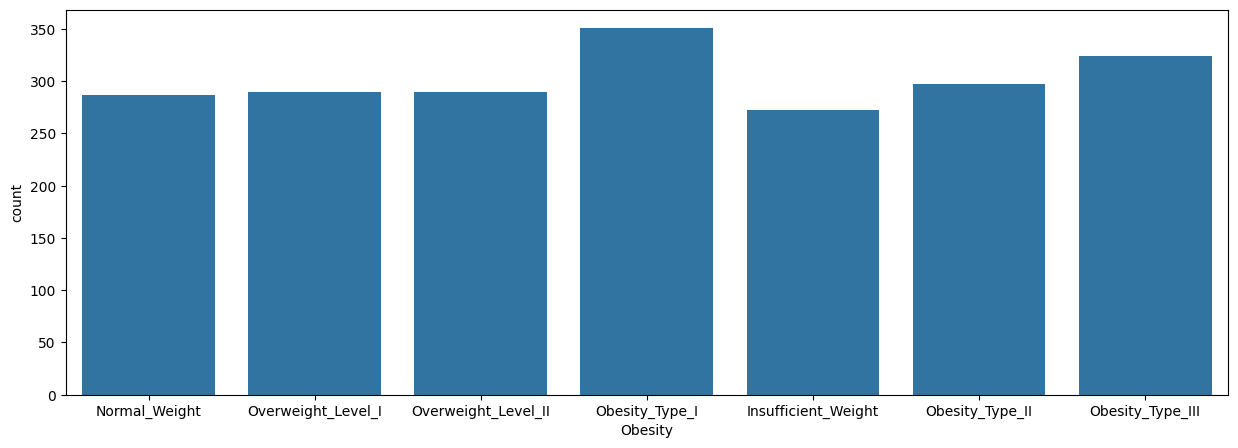

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Obesity', data = obesity_df)
plt.show()

## Numerical Features vs Label

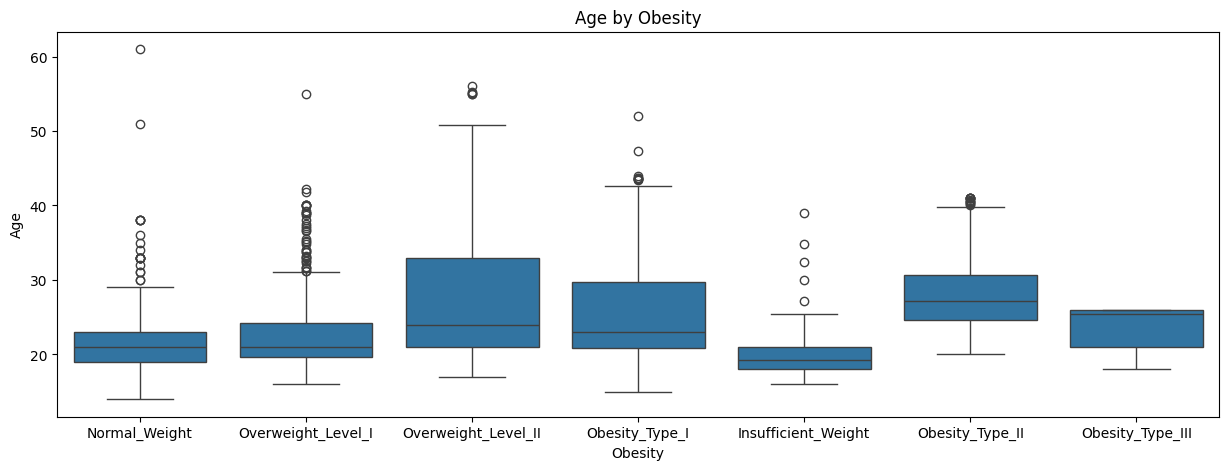

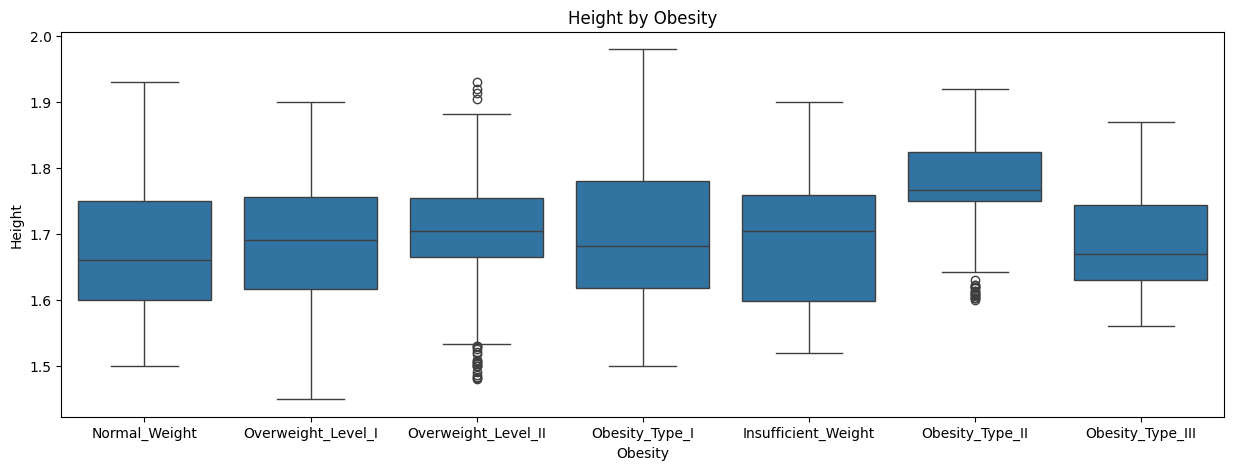

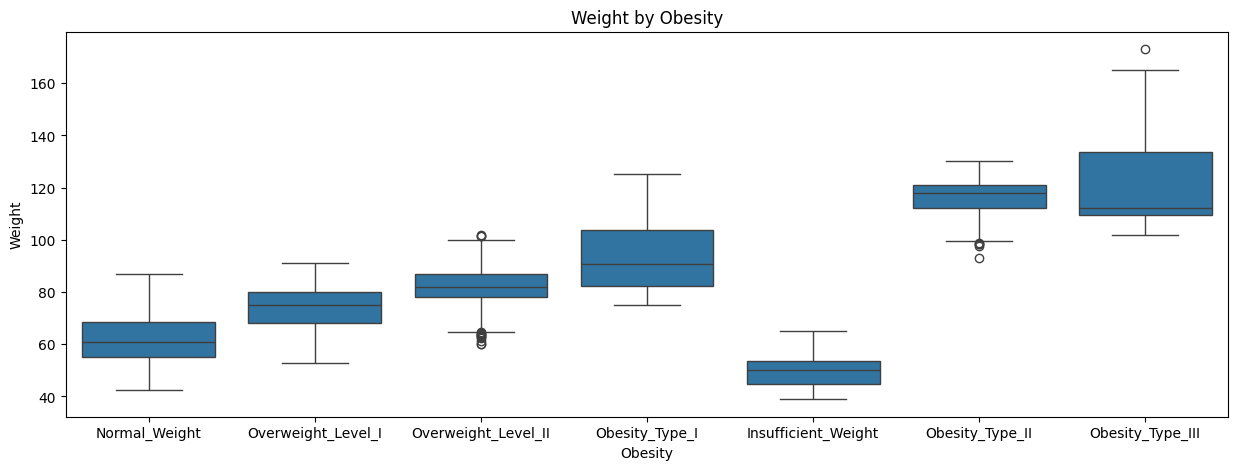

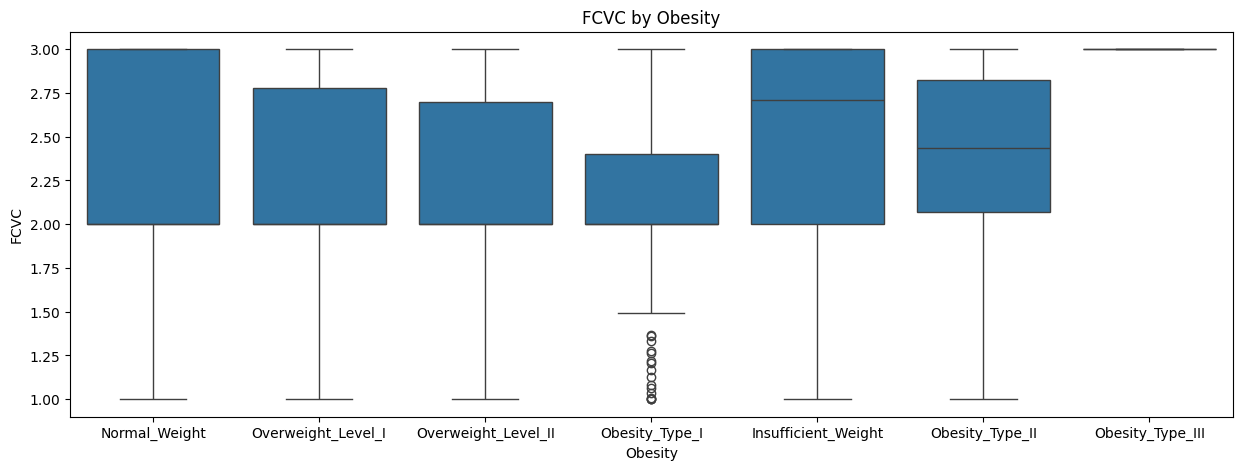

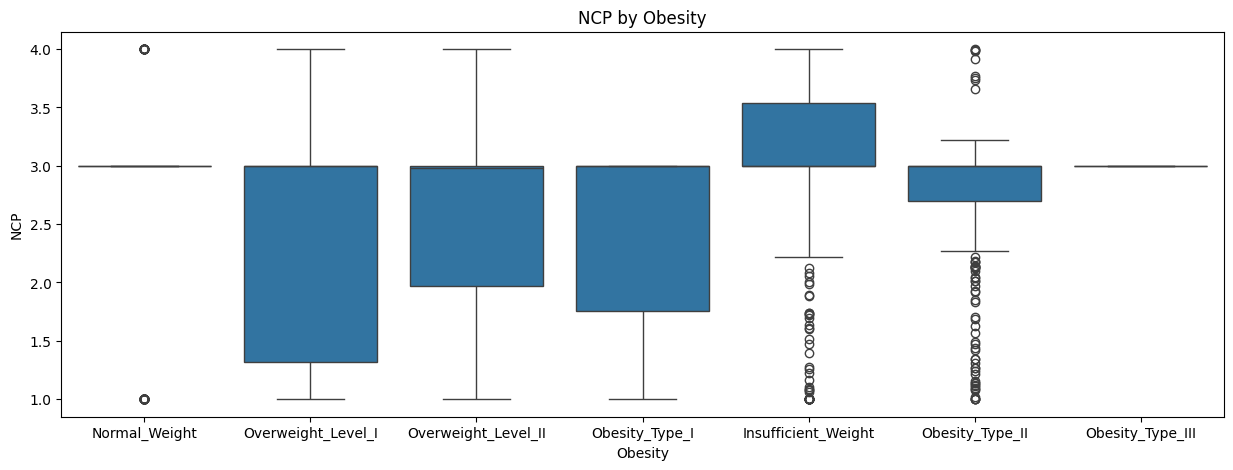

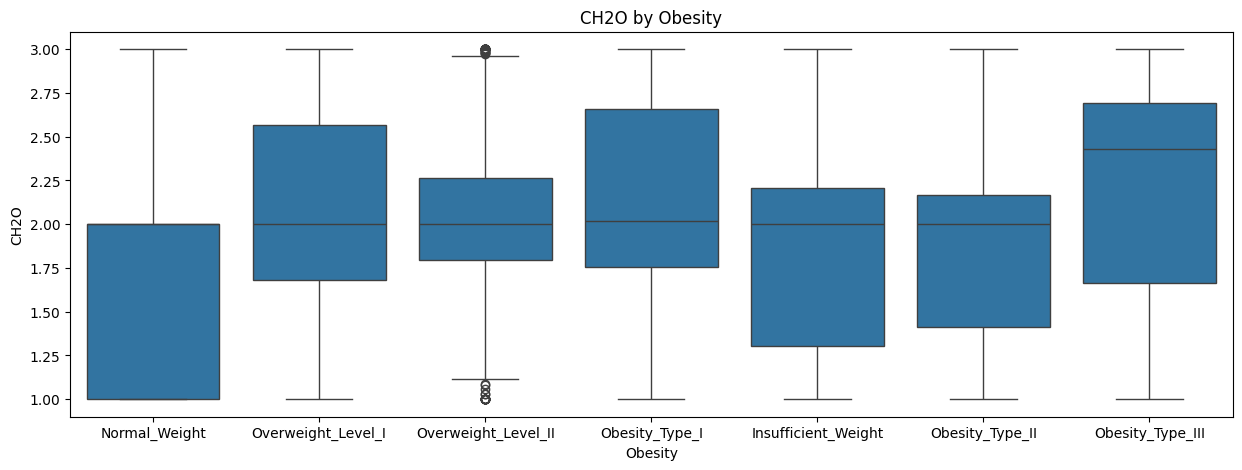

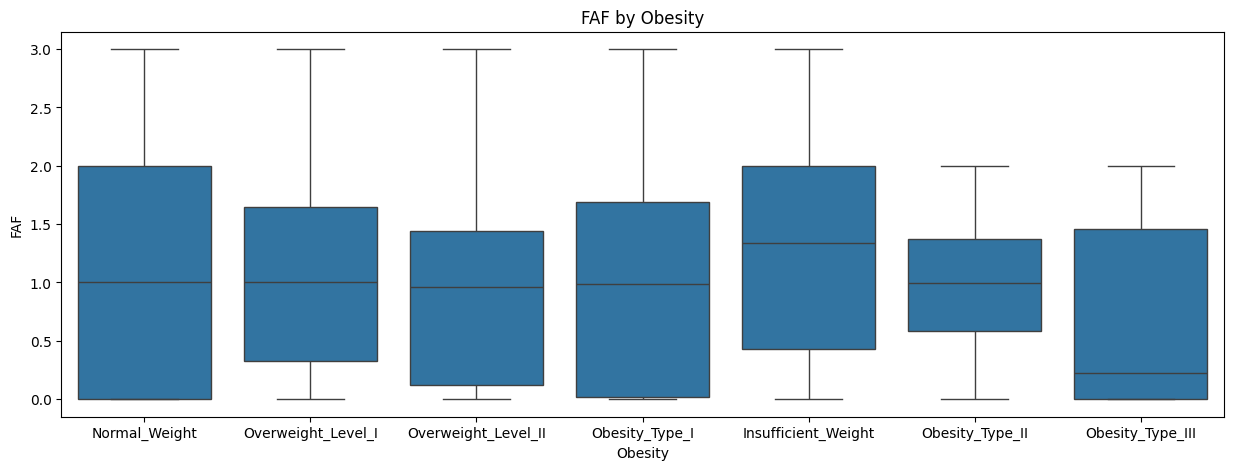

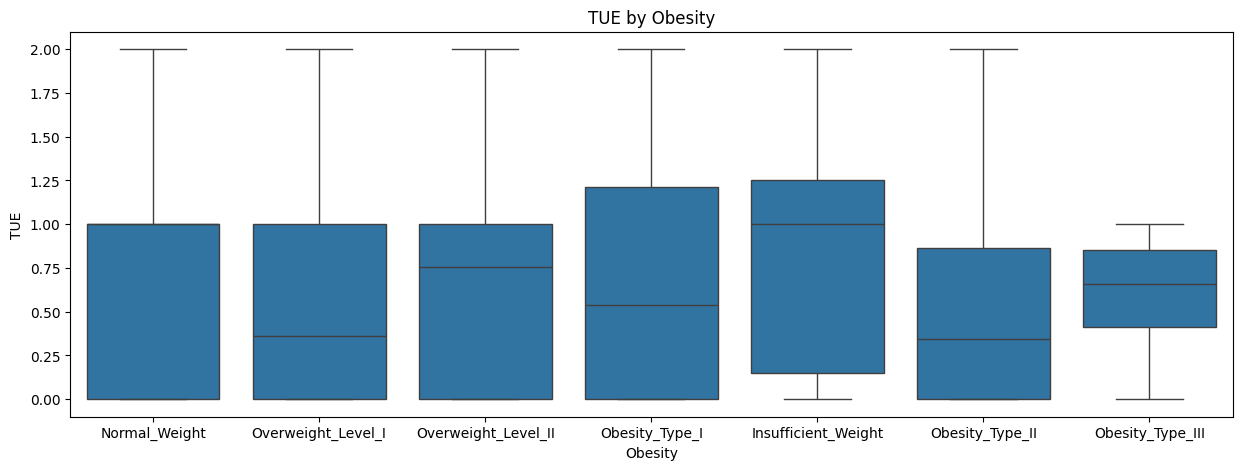

In [12]:
for col in numerical_features:
    plt.figure(figsize=(15,5))
    sns.boxplot(x='Obesity', y=col, data=obesity_df)
    plt.title(f"{col} by Obesity")
    plt.show()

## Categorical Features vs Label

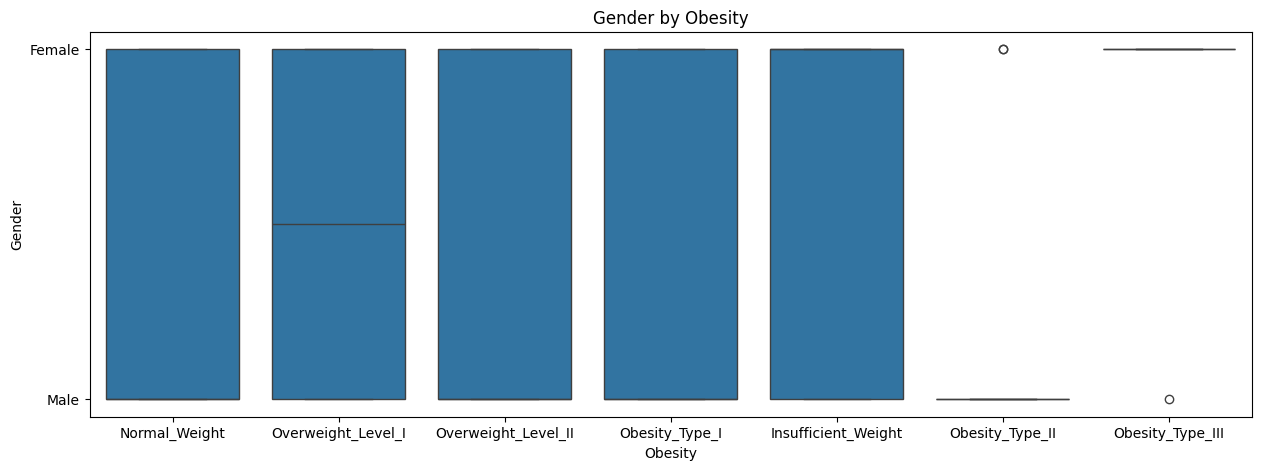

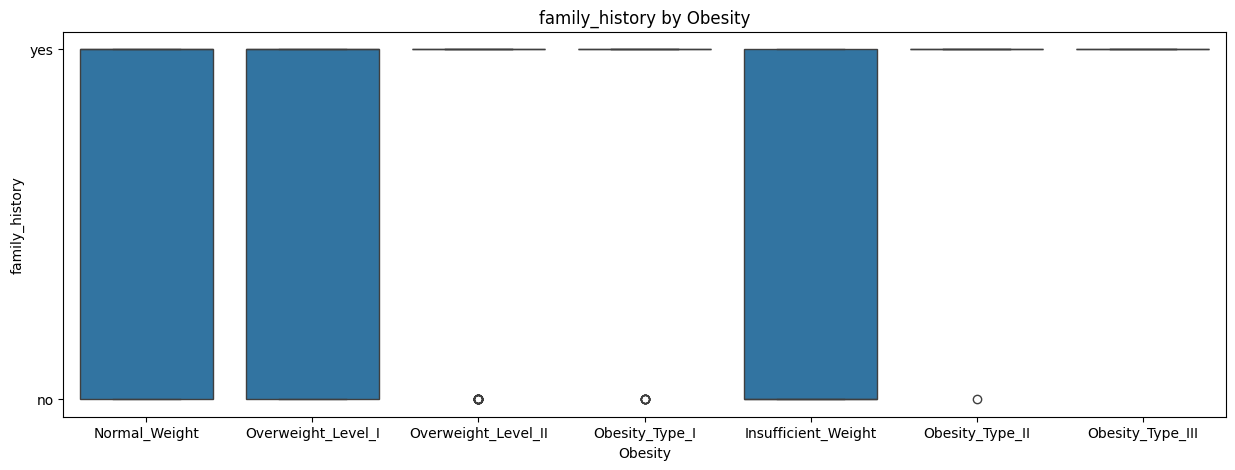

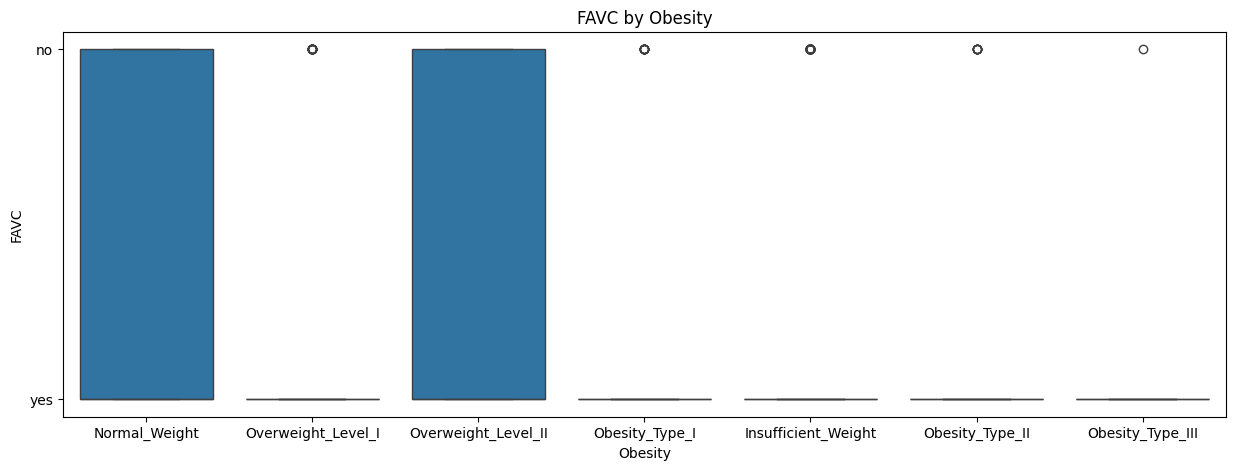

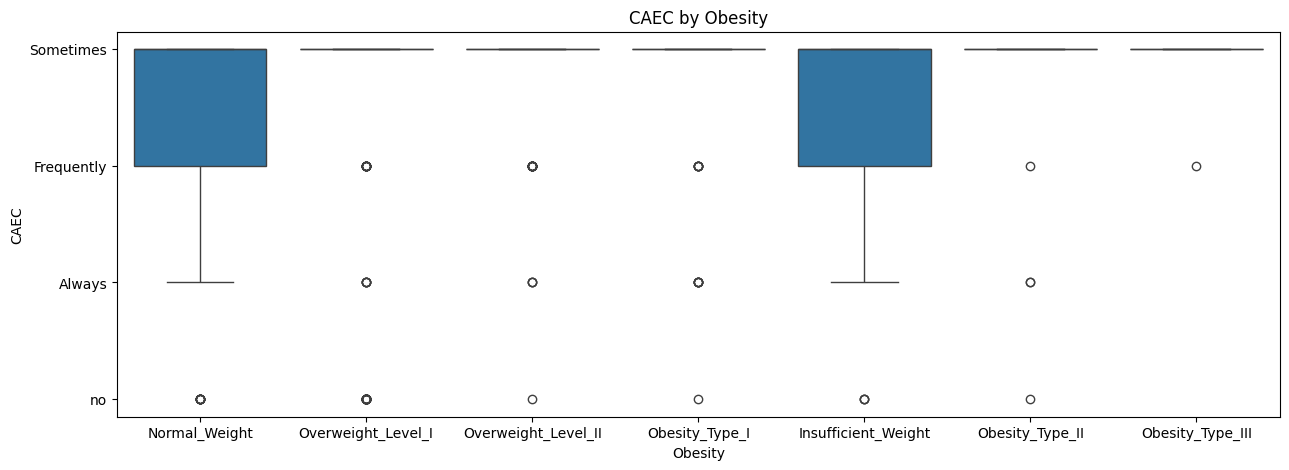

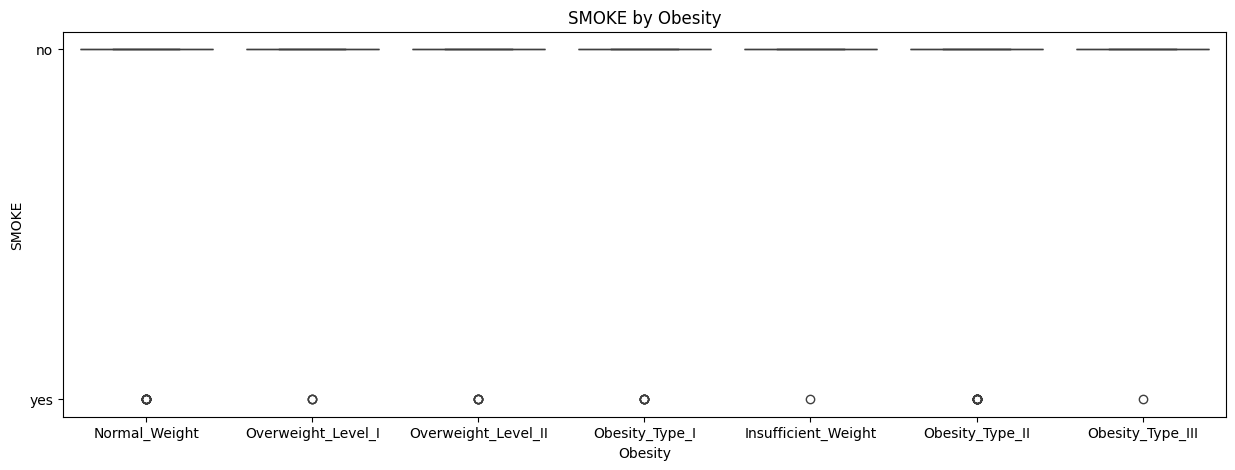

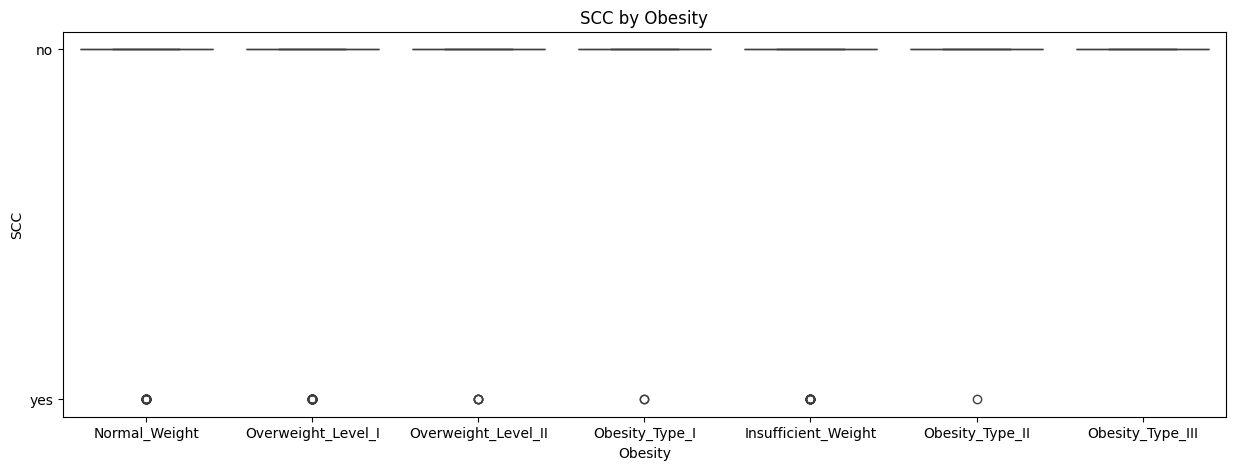

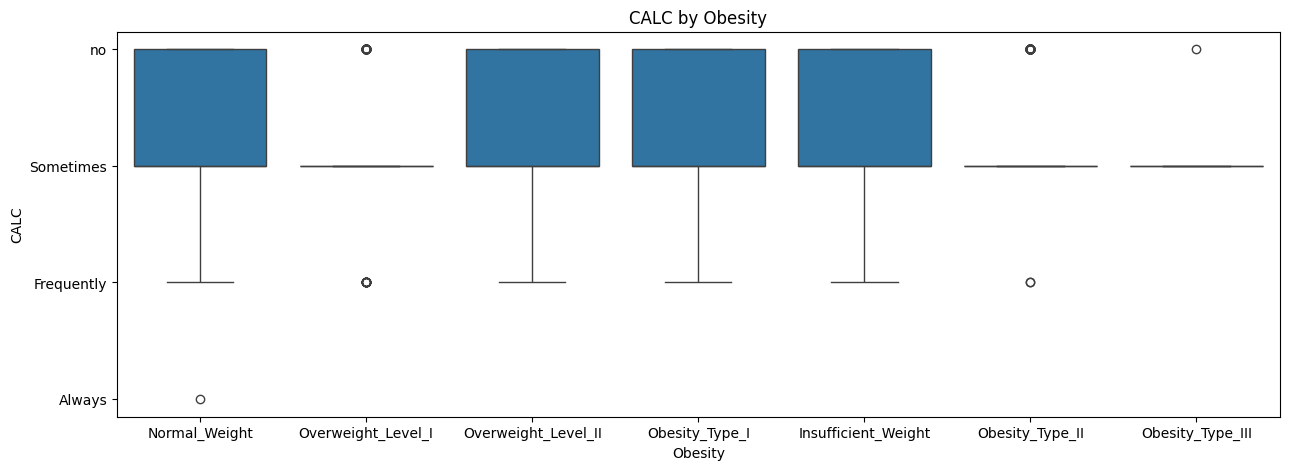

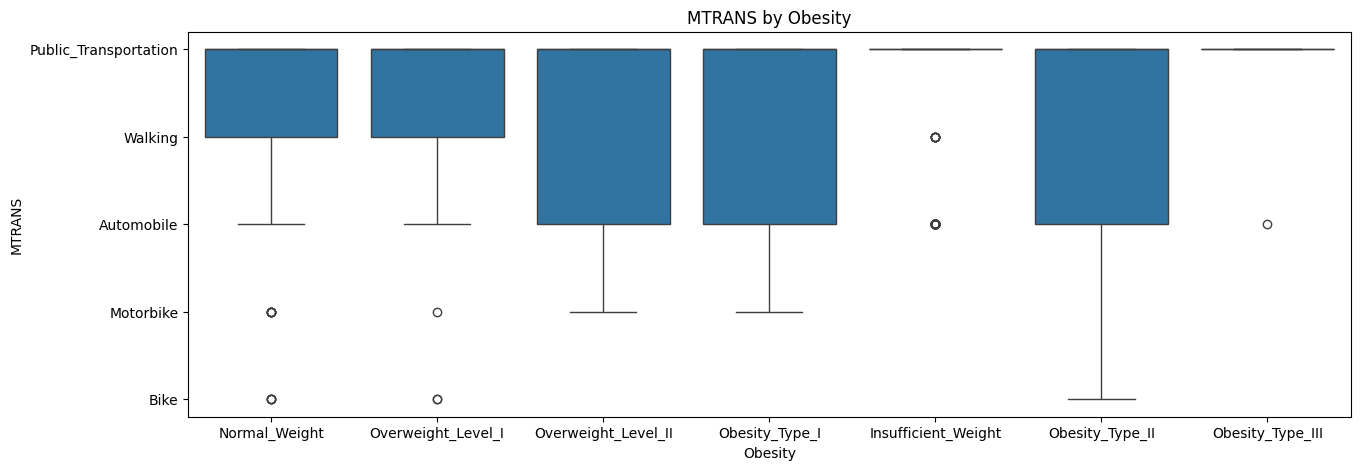

In [13]:
for col in categorical_features:
    plt.figure(figsize=(15,5))
    sns.boxplot(x='Obesity', y=col, data=obesity_df)
    plt.title(f"{col} by Obesity")
    plt.show()

## Correlation for Numerical Features

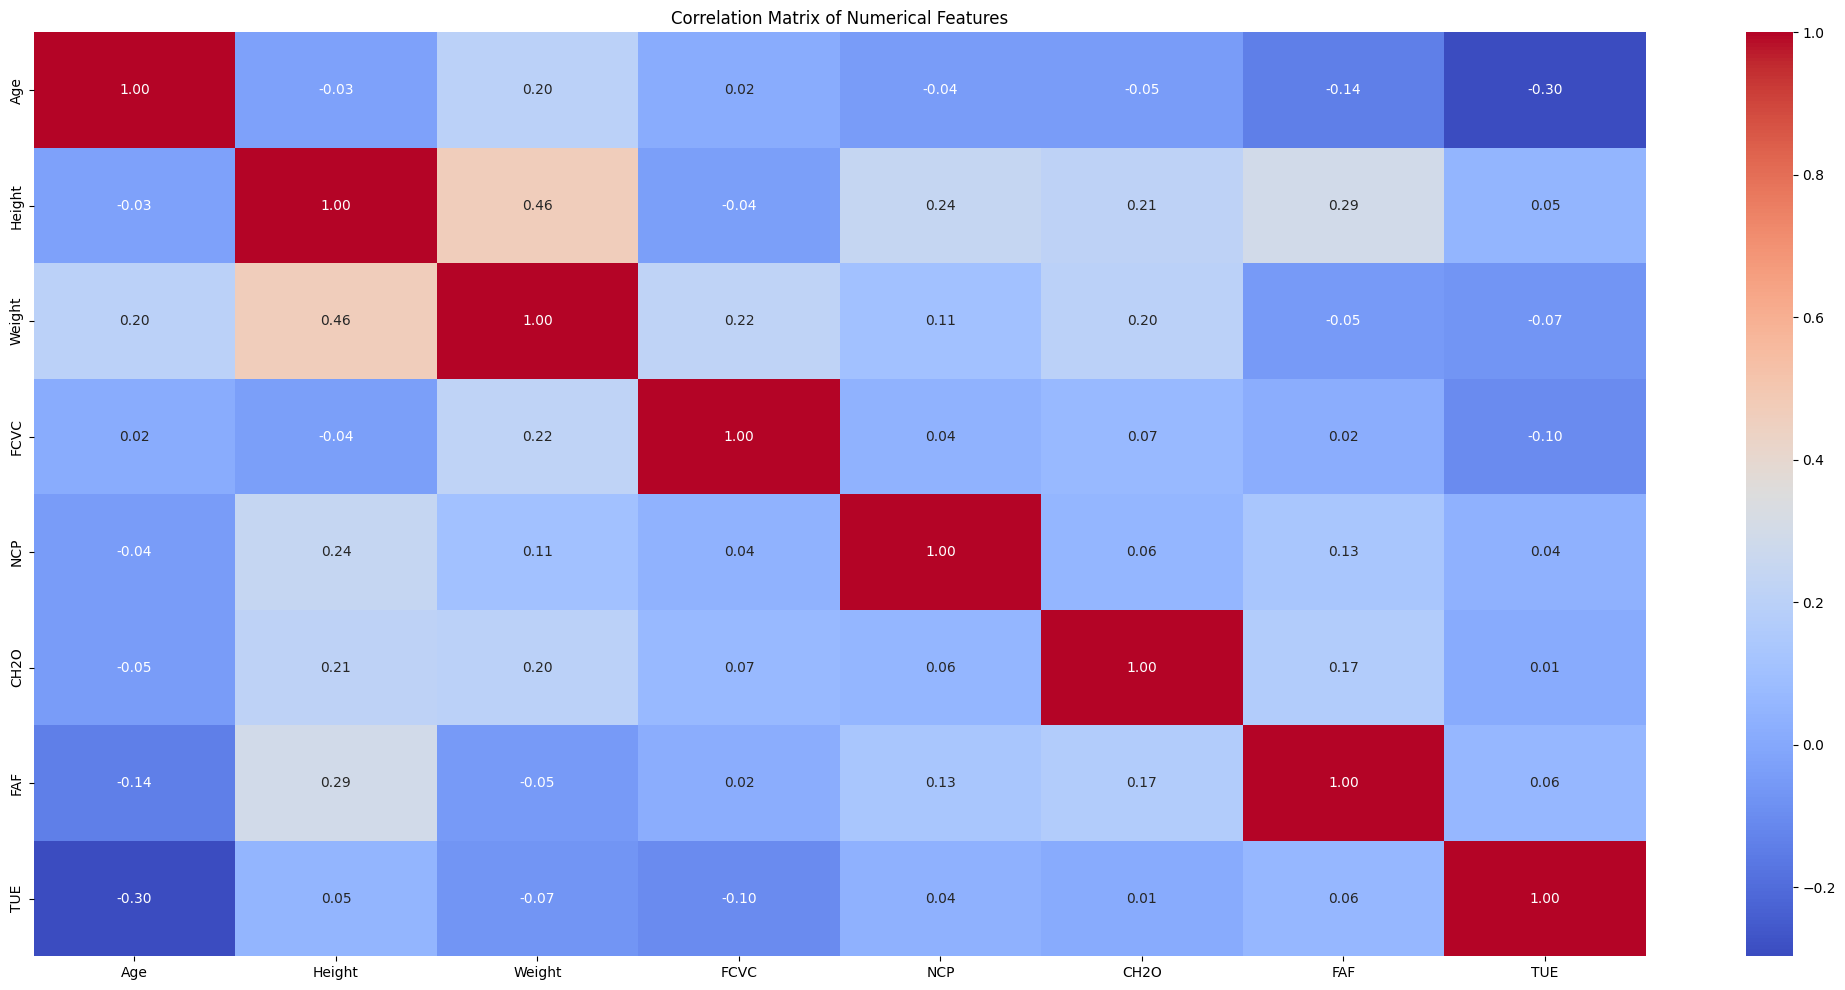

In [14]:
plt.figure(figsize=(26, 12))
sns.heatmap(obesity_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## High Correlation

In [15]:
corr = obesity_df[numerical_features].corr().abs()
high_corr = corr[(corr > 0.95) & (corr < 1.0)].stack().reset_index()
high_corr.columns = ['feat1','feat2','corr']

print("High correlations (> 0.95):")

high_corr.sort_values('corr', ascending=False).head()

High correlations (> 0.95):


,feat1,feat2,corr


## Pair Plot for Numeric Features

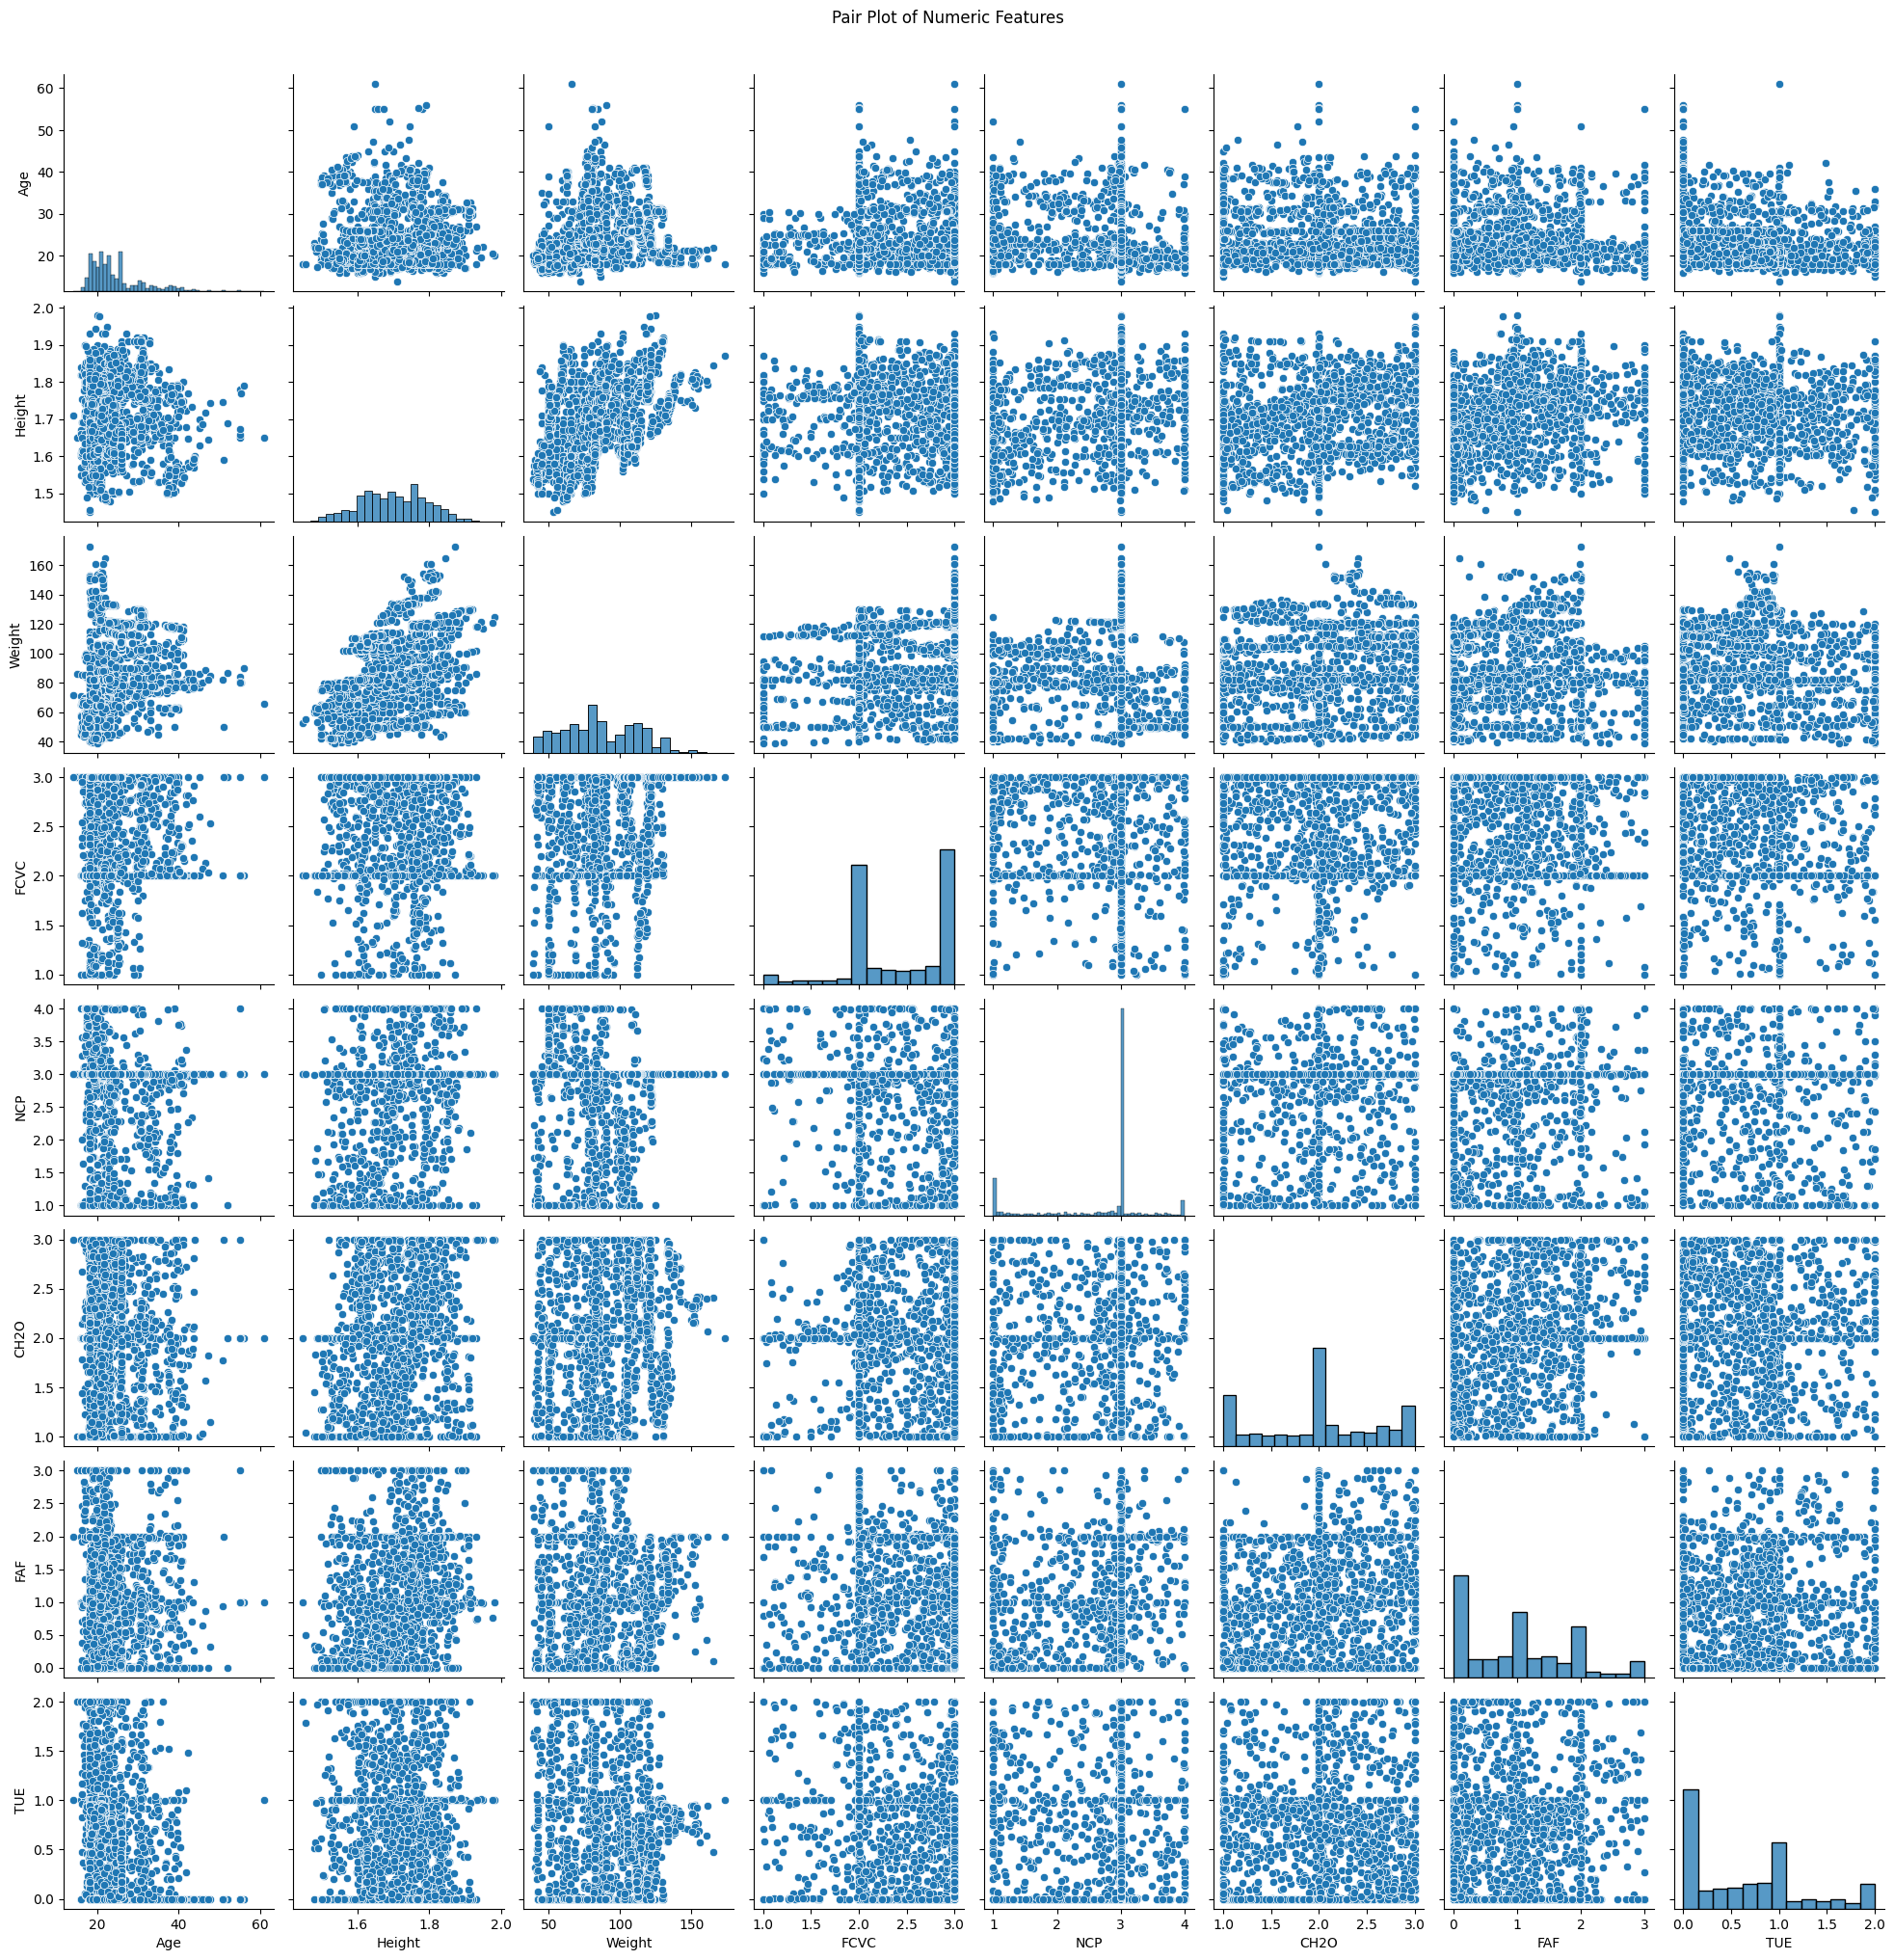

In [16]:
sns.pairplot(obesity_df[numerical_features])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

## Histograms for Numeric Features

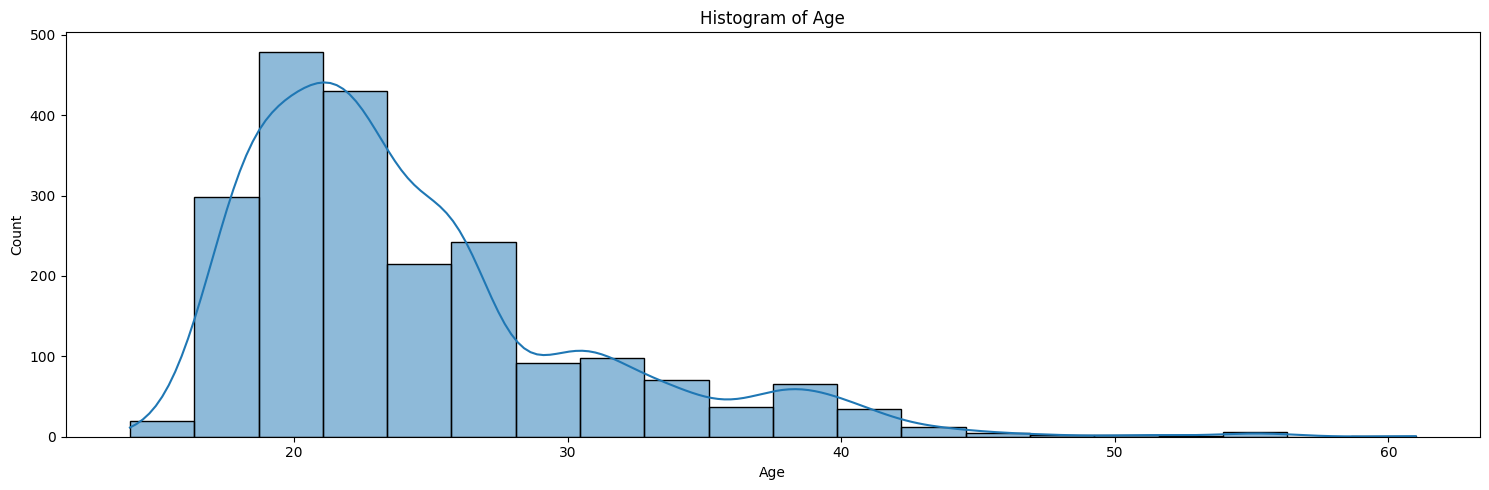

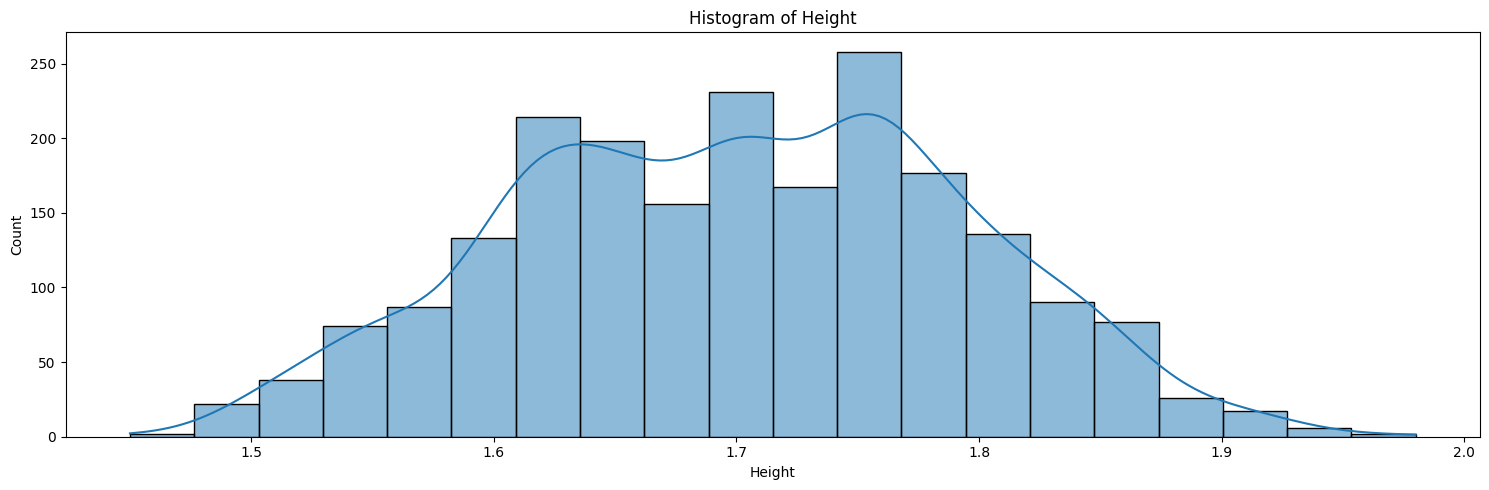

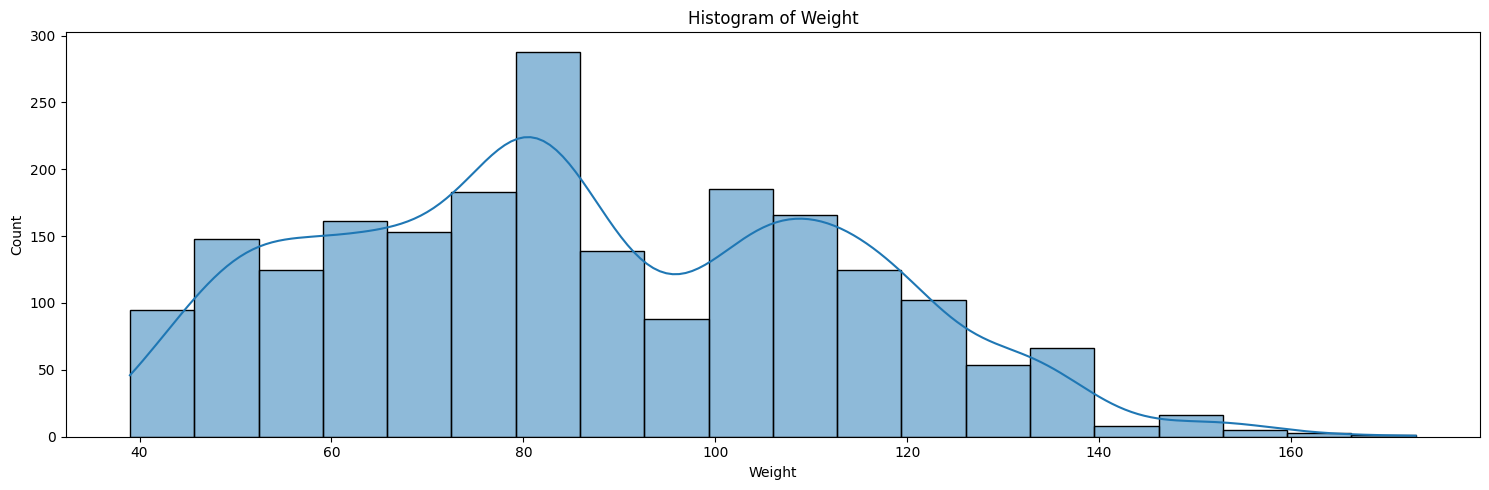

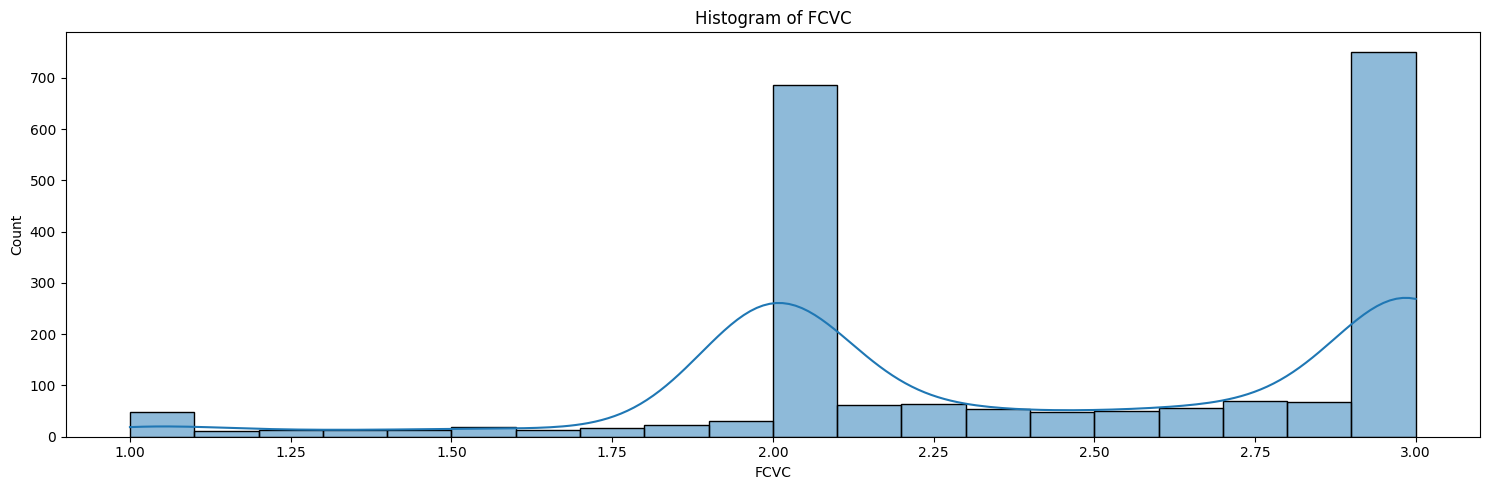

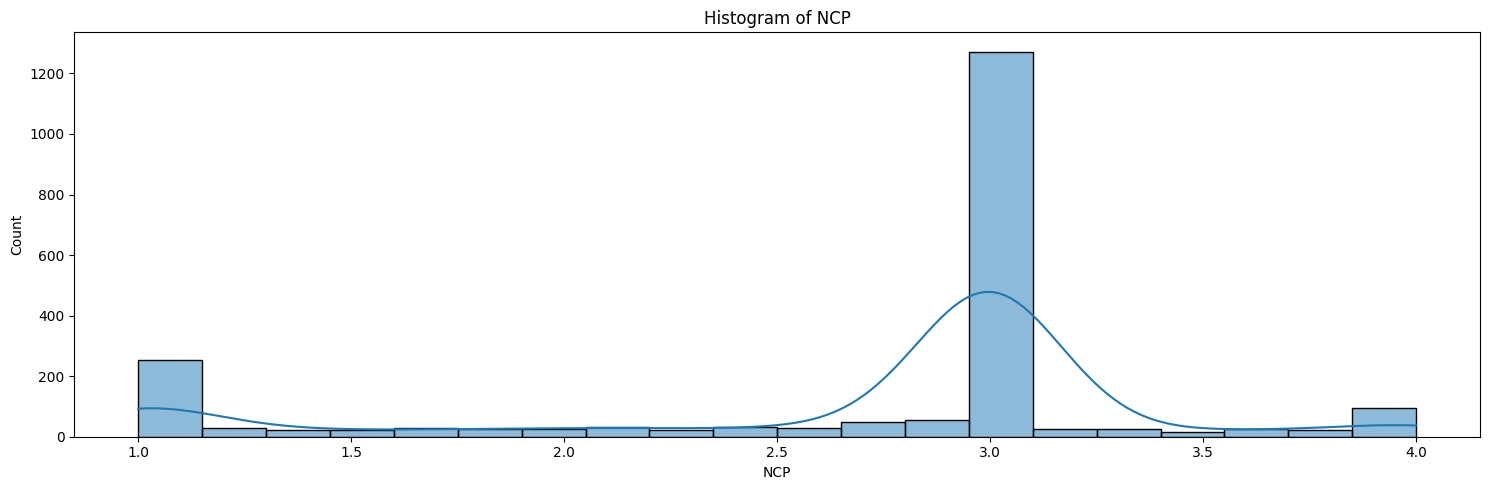

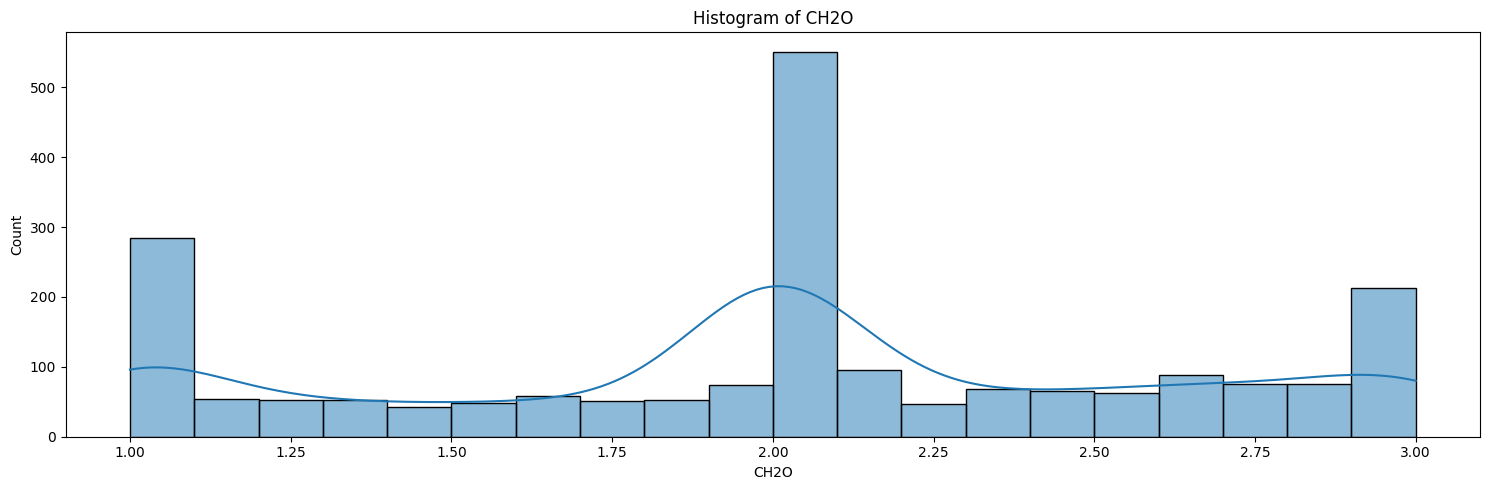

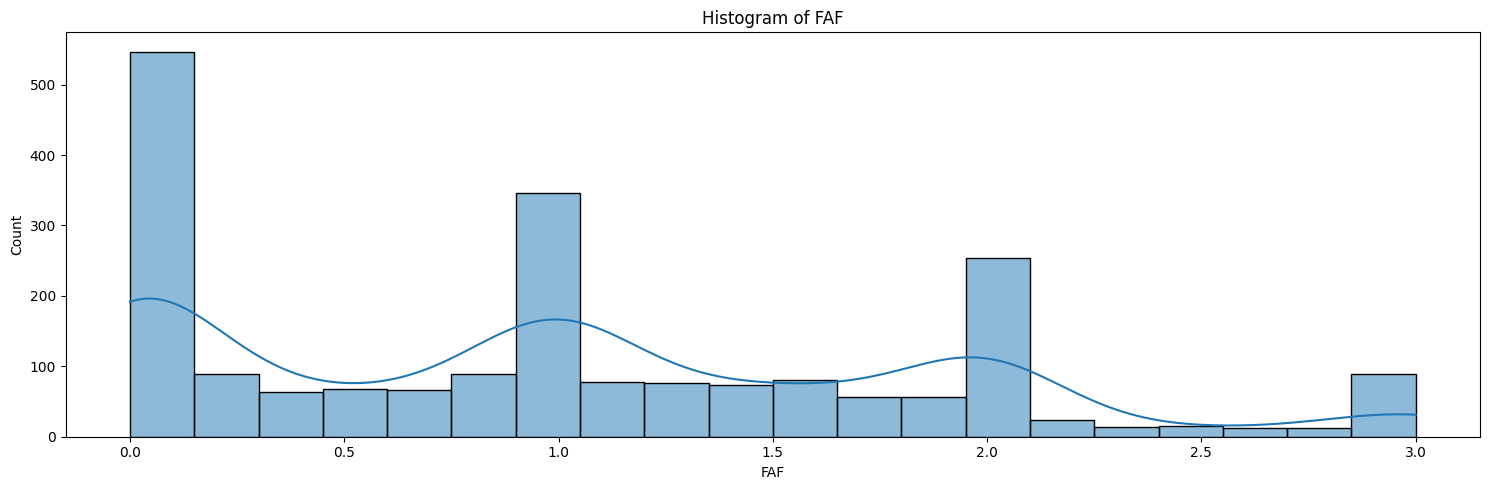

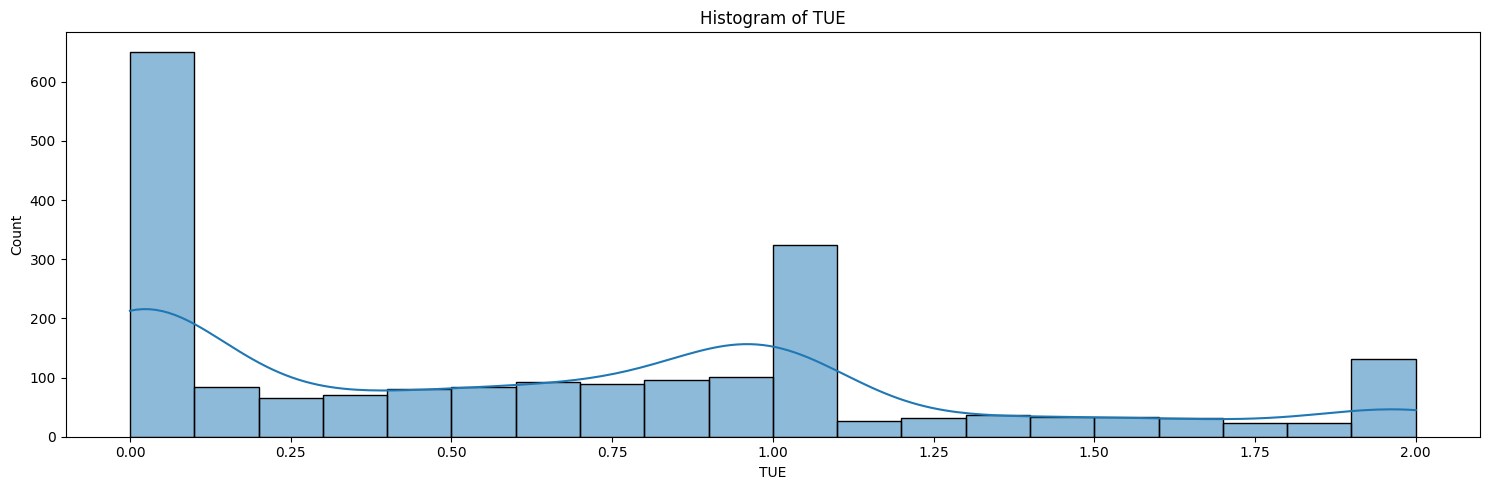

In [17]:
for col in numerical_features:
    plt.figure(figsize=(15,5))
    sns.histplot(obesity_df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

## Count Plots for Categorical Features

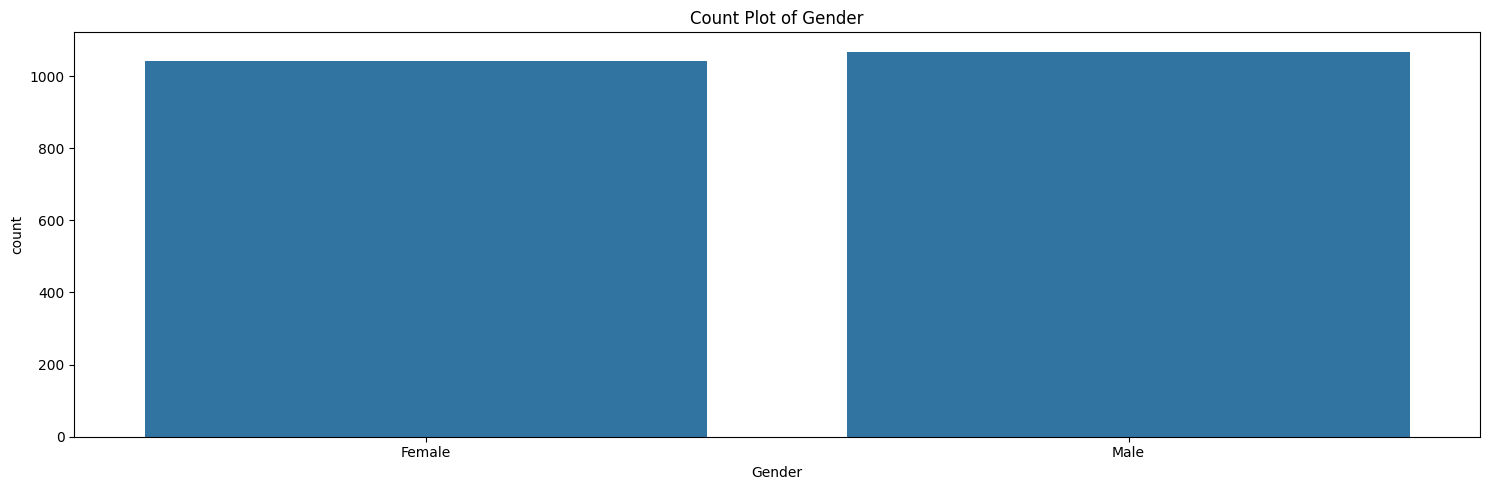

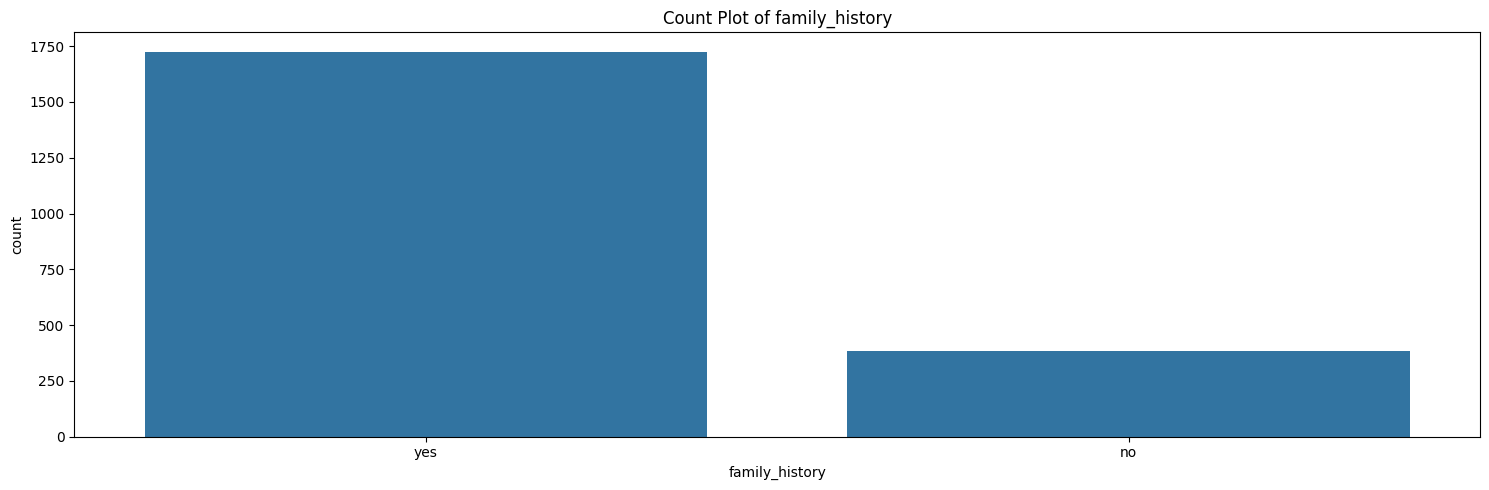

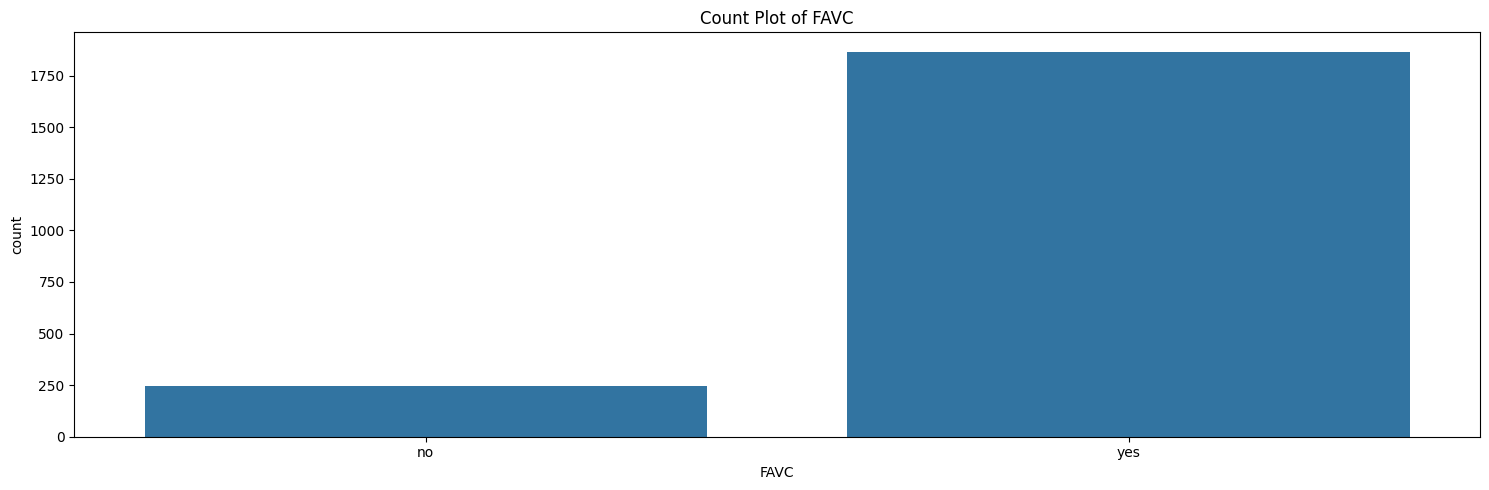

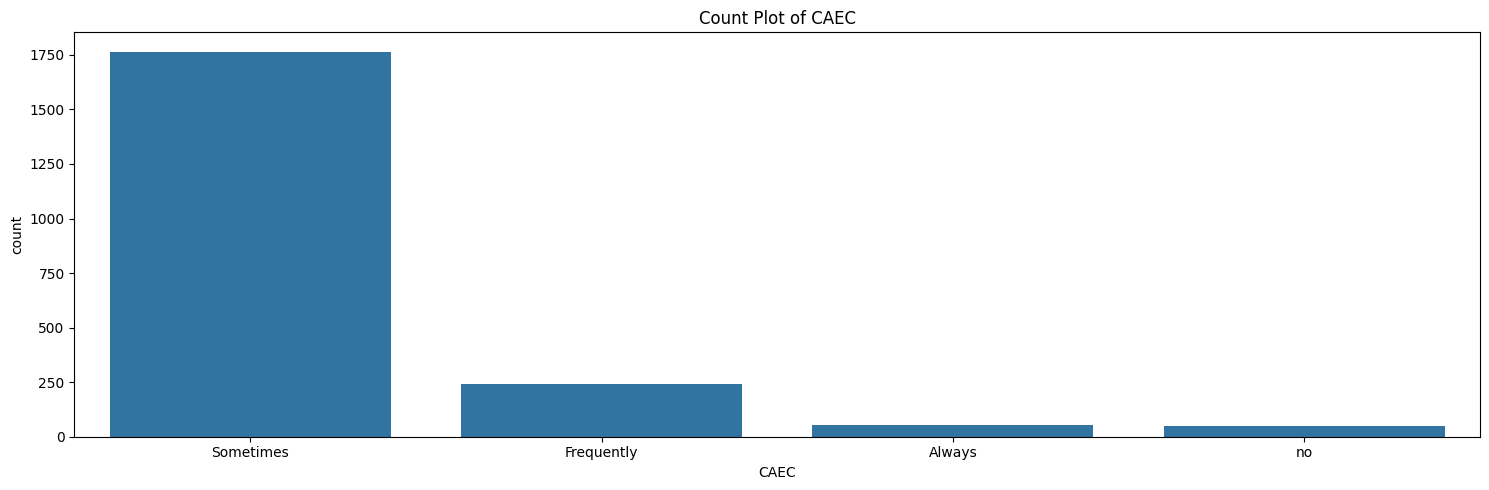

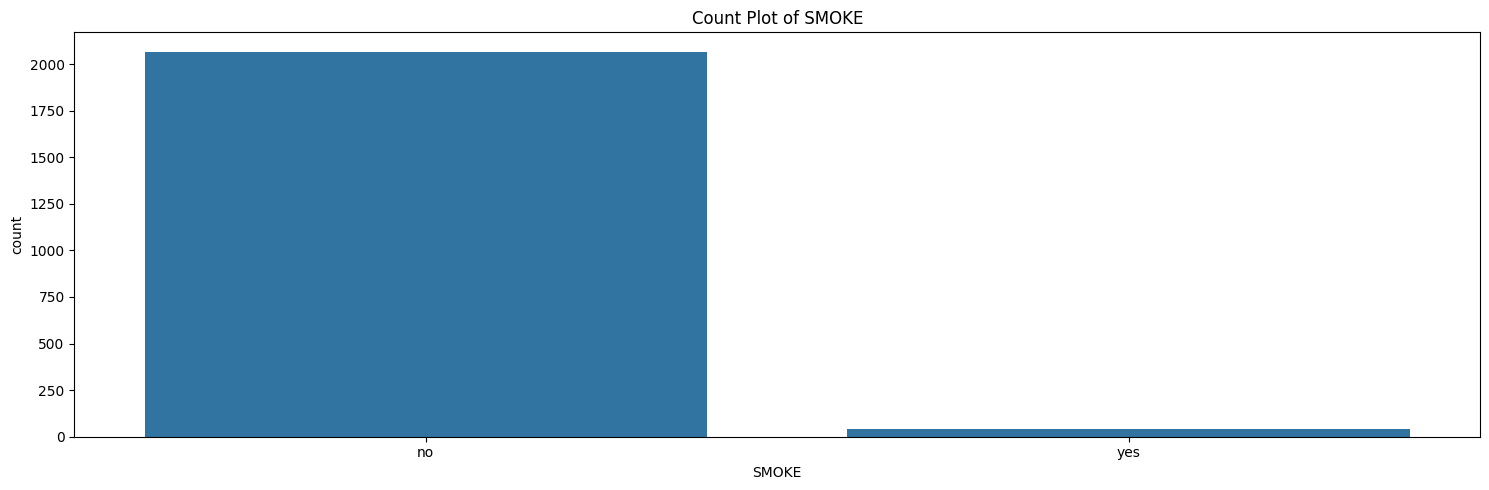

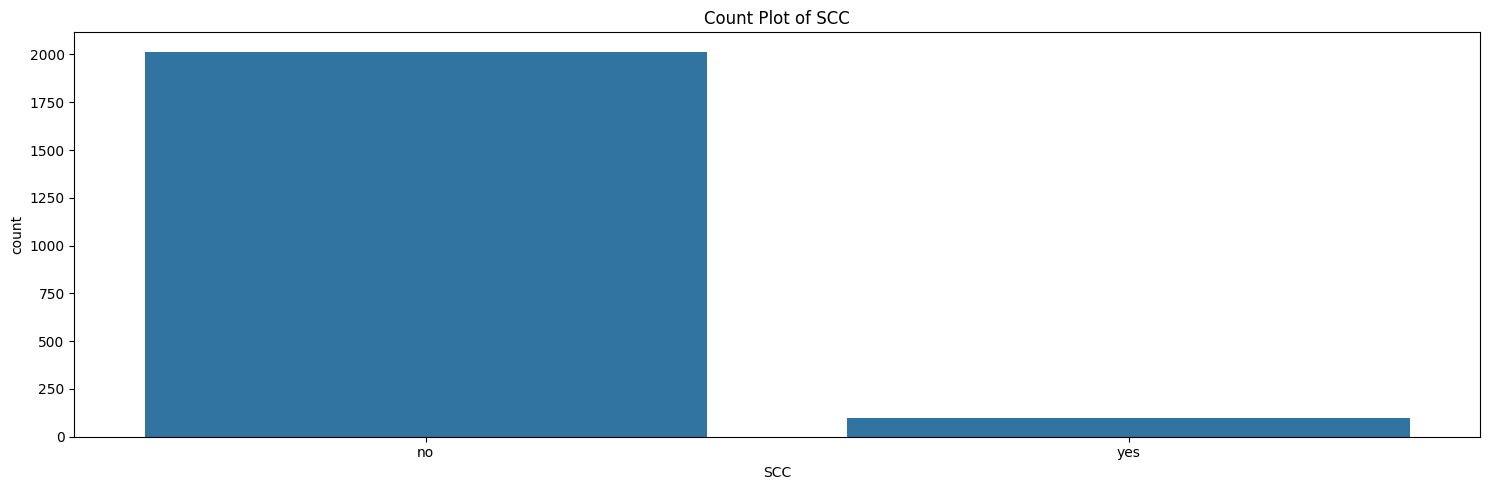

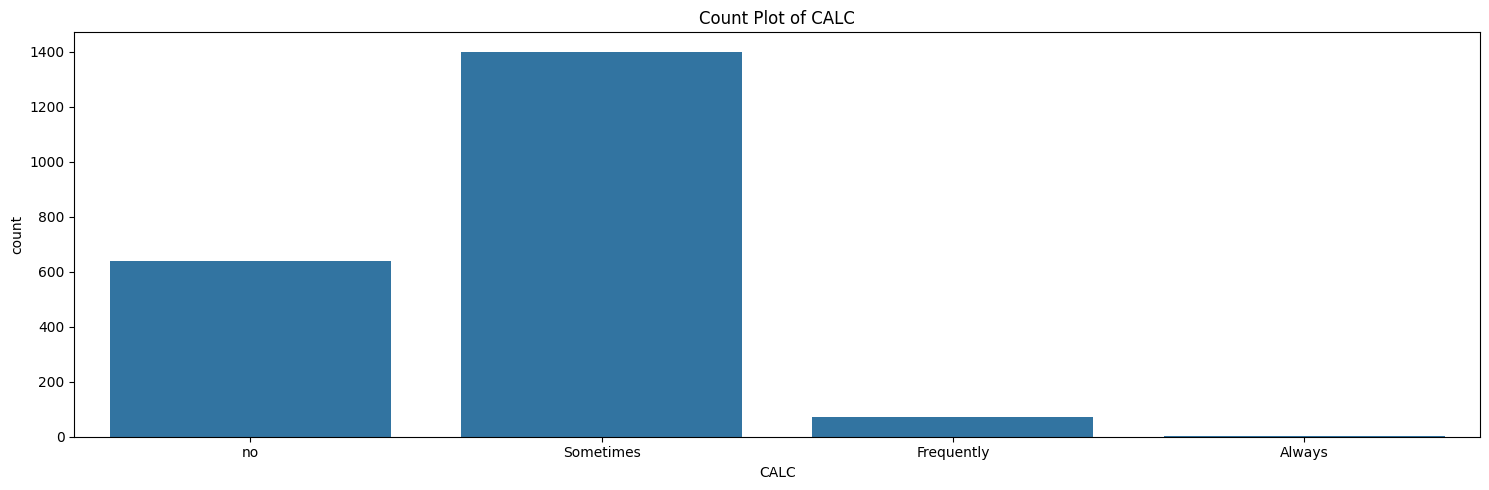

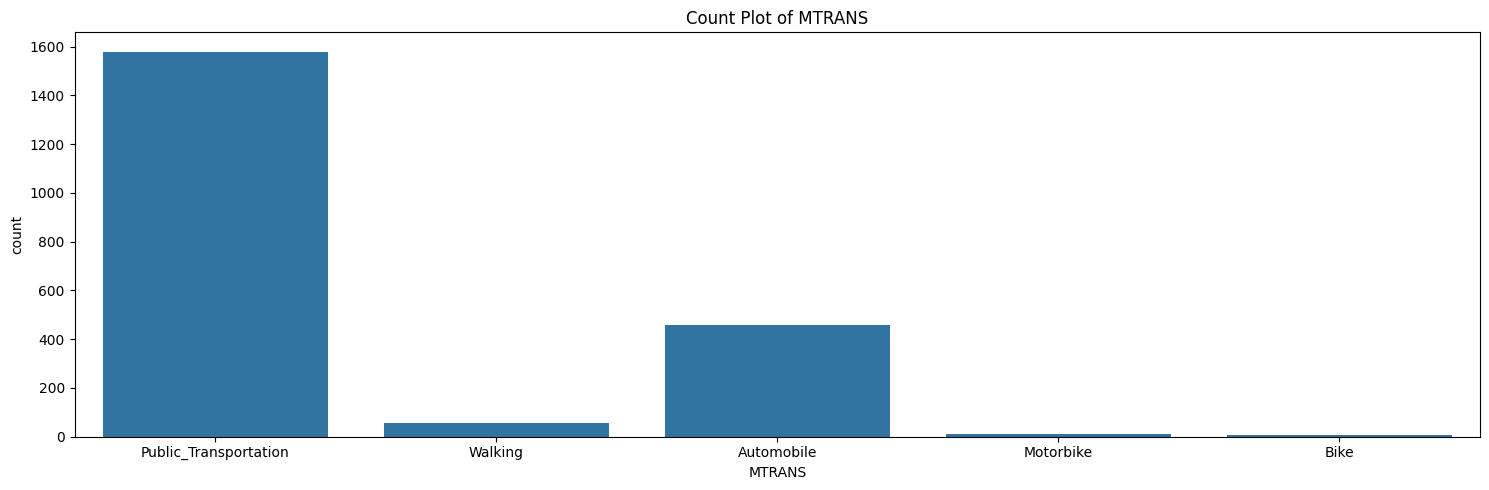

In [18]:
for col in categorical_features:
    plt.figure(figsize=(15,5))
    sns.countplot(x=obesity_df[col])
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

## Check Unique & Missing Values

In [19]:
for column in obesity_df.select_dtypes([object]):
    unique_values = obesity_df[column].unique()
    
    print(f"Column: {column}")
    print(f"3 Unique Values: {unique_values[:]}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Number of NULL values: {obesity_df[column].isnull().sum()}")
    print("-" * 30)

Column: Gender
3 Unique Values: ['Female' 'Male']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: family_history
3 Unique Values: ['yes' 'no']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: FAVC
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: CAEC
3 Unique Values: ['Sometimes' 'Frequently' 'Always' 'no']
Number of unique values: 4
Number of NULL values: 0
------------------------------
Column: SMOKE
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: SCC
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: CALC
3 Unique Values: ['no' 'Sometimes' 'Frequently' 'Always']
Number of unique values: 4
Number of NULL values: 0
------------------------------
Column: MTRANS
3 Unique Values: ['Public_Tran

## Check Outliers

In [20]:
def find_outliers_iqr(df, cols, factor=1.5):
    subset_df = df[cols]
    Q1 = subset_df.quantile(0.25)
    Q3 = subset_df.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR

    outlier_mask = ((df[cols] < lower) | (df[cols] > upper))

    return lower, upper, outlier_mask

def report_outliers(df, cols, outlier_mask):
    print("=== Outlier Report ===")

    for col in cols:
        mask_col = outlier_mask[col]
        n_out = mask_col.sum()

        print(f"{col:30s}: {n_out:4d} outliers")

        if n_out > 0:
            print("  contoh:", df.loc[mask_col, col].sort_values().unique()[:5])

    print("======================\n")

numerical_features = obesity_df.select_dtypes(include=np.number)

In [21]:
lower_bound, upper_bound, mask_df = find_outliers_iqr(obesity_df, numerical_features.columns, factor=1.5)
report_outliers(obesity_df, numerical_features.columns, mask_df)

=== Outlier Report ===
Age                           :  168 outliers
  contoh: [35.125401 35.194089 35.217173 35.322112 35.389491]
Height                        :    1 outliers
  contoh: [1.98]
Weight                        :    1 outliers
  contoh: [173.]
FCVC                          :    0 outliers
NCP                           :  579 outliers
  contoh: [1.       1.000283 1.000414 1.00061  1.001383]
CH2O                          :    0 outliers
FAF                           :    0 outliers
TUE                           :    0 outliers



## Check Duplicates

In [22]:
duplicates_all = obesity_df[obesity_df.duplicated(keep=False)]

duplicate_groups = (
    duplicates_all
    .groupby(list(obesity_df.columns), group_keys=False)
    .apply(lambda x: x.index.tolist())
)

print(f"Jumlah grup duplikat: {len(duplicate_groups)}")
print("Pasangan baris yang duplikat dan isi datanya:\n")

for group in duplicate_groups:
    if len(group) > 1:
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                idx1, idx2 = group[i], group[j]
                
                print(f"Baris {idx1} duplikat dengan baris {idx2}:")
                print(obesity_df.loc[[idx1, idx2]])
                print("-" * 80)

Jumlah grup duplikat: 9
Pasangan baris yang duplikat dan isi datanya:

Baris 295 duplikat dengan baris 309:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
295  Female  16.0    1.66    58.0             no   no   2.0  1.0  Sometimes   
309  Female  16.0    1.66    58.0             no   no   2.0  1.0  Sometimes   

    SMOKE  CH2O SCC  FAF  TUE CALC   MTRANS        Obesity  
295    no   1.0  no  0.0  1.0   no  Walking  Normal_Weight  
309    no   1.0  no  0.0  1.0   no  Walking  Normal_Weight  
--------------------------------------------------------------------------------
Baris 282 duplikat dengan baris 460:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
282  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
460  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   

    SMOKE  CH2O SCC  FAF  TUE CALC                 MTRANS        Obesity  
282    no   1.0  no  1.0  1.0   no  P

C:\Users\B.A.P\AppData\Local\Temp\ipykernel_11368\1883680255.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.index.tolist())


    Gender   Age  Height  Weight family_history FAVC  FCVC  NCP CAEC SMOKE  \
830   Male  21.0    1.62    70.0             no  yes   2.0  1.0   no    no   
831   Male  21.0    1.62    70.0             no  yes   2.0  1.0   no    no   

     CH2O SCC  FAF  TUE       CALC                 MTRANS             Obesity  
830   3.0  no  1.0  0.0  Sometimes  Public_Transportation  Overweight_Level_I  
831   3.0  no  1.0  0.0  Sometimes  Public_Transportation  Overweight_Level_I  
--------------------------------------------------------------------------------
Baris 830 duplikat dengan baris 832:
    Gender   Age  Height  Weight family_history FAVC  FCVC  NCP CAEC SMOKE  \
830   Male  21.0    1.62    70.0             no  yes   2.0  1.0   no    no   
832   Male  21.0    1.62    70.0             no  yes   2.0  1.0   no    no   

     CH2O SCC  FAF  TUE       CALC                 MTRANS             Obesity  
830   3.0  no  1.0  0.0  Sometimes  Public_Transportation  Overweight_Level_I  
832   3.0  n

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Drop Duplicates

In [23]:
obesity_df_cleaned = obesity_df.drop_duplicates(keep='first').reset_index(drop=True)

print(f"Jumlah baris sebelum penghapusan: {len(obesity_df)}")
print(f"Jumlah baris setelah penghapusan: {len(obesity_df_cleaned)}")
print(f"Jumlah baris duplikat yang dihapus: {len(obesity_df) - len(obesity_df_cleaned)}")

Jumlah baris sebelum penghapusan: 2111
Jumlah baris setelah penghapusan: 2087
Jumlah baris duplikat yang dihapus: 24


## Handle Outliers

In [24]:
# IQR method
def handle_outliers_iqr(df, cols, factor=1.5):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)

    return df

obesity_df_cleaned = handle_outliers_iqr(obesity_df_cleaned, numerical_features.columns)

lower_bound, upper_bound, mask_df = find_outliers_iqr(obesity_df_cleaned, numerical_features.columns, factor=1.5)
report_outliers(obesity_df_cleaned, numerical_features.columns, mask_df)

=== Outlier Report ===
Age                           :    0 outliers
Height                        :    0 outliers
Weight                        :    0 outliers
FCVC                          :    0 outliers
NCP                           :    0 outliers
CH2O                          :    0 outliers
FAF                           :    0 outliers
TUE                           :    0 outliers



In [25]:
obesity_df_cleaned

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,2.243667,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2083,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2084,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2085,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Check Unique & Missing Values (After Cleaning)

In [26]:
for column in obesity_df_cleaned.select_dtypes([object]):
    unique_values = obesity_df_cleaned[column].unique()
    
    print(f"Column: {column}")
    print(f"3 Unique Values: {unique_values[:3]}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Number of NULL values: {obesity_df_cleaned[column].isnull().sum()}")
    print("-" * 30)

Column: Gender
3 Unique Values: ['Female' 'Male']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: family_history
3 Unique Values: ['yes' 'no']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: FAVC
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: CAEC
3 Unique Values: ['Sometimes' 'Frequently' 'Always']
Number of unique values: 4
Number of NULL values: 0
------------------------------
Column: SMOKE
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: SCC
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: CALC
3 Unique Values: ['no' 'Sometimes' 'Frequently']
Number of unique values: 4
Number of NULL values: 0
------------------------------
Column: MTRANS
3 Unique Values: ['Public_Transportation' 'W

## Pipeline Encoding & Scaling

In [27]:
label_encoder = LabelEncoder()

obesity_df_cleaned['Obesity'] = label_encoder.fit_transform(obesity_df_cleaned['Obesity'])

joblib.dump(label_encoder, 'obesity_label_encoder.joblib')

def get_feature_lists(df, target_column='Obesity'):
    numeric = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric = [col for col in numeric if col != target_column]
    
    categorical = df.select_dtypes(include=['object']).columns.tolist()
    categorical = [col for col in categorical if col != target_column]
    
    return numeric, categorical

numeric_features, categorical_features = get_feature_lists(obesity_df_cleaned)

# Pipeline untuk fitur numerik
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split X & y
X = obesity_df_cleaned.drop(columns=['Obesity'])
y = obesity_df_cleaned['Obesity']

# Transform
X_processed = preprocessor.fit_transform(X)

# Create Dataframe
encoded_cat_cols = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
processed_columns = numeric_features + list(encoded_cat_cols)
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

# Concat Dataframe
processed_df = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

# Save into CSV & Joblib
processed_df.to_csv('obesity_processed.csv', index=False)

joblib.dump(preprocessor, 'obesity_preprocessor.joblib')

print("Data saved into CSV & Joblib.")

Data saved into CSV & Joblib.


In [28]:
processed_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Obesity
0,-0.556483,-0.887421,-0.873051,-0.788364,0.401080,-0.007810,-1.186977,0.554211,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-0.556483,-1.960826,-1.178610,1.082164,0.401080,1.636552,2.328908,-1.090505,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.179195,1.044709,-0.376517,-0.788364,0.401080,-0.007810,1.156947,0.554211,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.575380,1.044709,0.005432,1.082164,0.401080,-0.007810,1.156947,-1.090505,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,-0.367839,0.830028,0.112377,-0.788364,-1.720013,-0.007810,-1.186977,-1.090505,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-0.560852,0.086480,1.701610,1.082164,0.401080,-0.454848,0.777546,0.400014,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2083,-0.371057,0.492807,1.790773,1.082164,0.401080,0.000626,0.385081,-0.104876,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2084,-0.268983,0.531686,1.788726,1.082164,0.401080,0.081303,0.470422,-0.027545,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2085,0.077725,0.394762,1.775636,1.082164,0.401080,1.393744,0.148013,-0.126644,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [29]:
processed_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_no',
       'family_history_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes',
       'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Obesity'],
      dtype='object')

In [30]:
preprocessor = joblib.load('obesity_preprocessor.joblib')
label_encoder = joblib.load('obesity_label_encoder.joblib')
processed_df = pd.read_csv('obesity_processed.csv')

X_processed = processed_df.drop(columns=['Obesity'])
y_processed = processed_df['Obesity']

numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]
encoded_cat_cols = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

X_num_inv = preprocessor.named_transformers_['num']['scaler'].inverse_transform(
    X_processed[numeric_features]
)

X_cat_inv = preprocessor.named_transformers_['cat']['encoder'].inverse_transform(
    X_processed[encoded_cat_cols]
)

X_num_df = pd.DataFrame(X_num_inv, columns=numeric_features)
X_cat_df = pd.DataFrame(X_cat_inv, columns=categorical_features)

y_inverse = label_encoder.inverse_transform(y_processed)

df_reversed = pd.concat([X_num_df, X_cat_df], axis=1)
col_order = numeric_features + categorical_features + ['Obesity']
df_reversed['Obesity'] = y_inverse
df_reversed = df_reversed[col_order]

df_reversed.to_csv('obesity_reversed.csv', index=False)
print('Reversion complete. Saved to obesity_reversed.csv')

Reversion complete. Saved to obesity_reversed.csv


In [31]:
df_reversed

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity
0,21.000000,1.620000,64.000000,2.0,3.000000,2.000000,0.000000,1.000000,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,21.000000,1.520000,56.000000,3.0,3.000000,3.000000,3.000000,0.000000,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,1.800000,77.000000,2.0,3.000000,2.000000,2.000000,1.000000,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,27.000000,1.800000,87.000000,3.0,3.000000,2.000000,2.000000,0.000000,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,22.000000,1.780000,89.800000,2.0,2.243667,2.000000,0.000000,0.000000,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,20.976842,1.710730,131.408528,3.0,3.000000,1.728139,1.676269,0.906247,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2083,21.982942,1.748584,133.742943,3.0,3.000000,2.005130,1.341390,0.599270,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2084,22.524036,1.752206,133.689352,3.0,3.000000,2.054193,1.414209,0.646288,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2085,24.361936,1.739450,133.346641,3.0,3.000000,2.852339,1.139107,0.586035,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [32]:
for column in df_reversed.select_dtypes([object]):
    unique_values = df_reversed[column].unique()
    
    print(f"Column: {column}")
    print(f"3 Unique Values: {unique_values[:]}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Number of NULL values: {df_reversed[column].isnull().sum()}")
    print("-" * 30)

Column: Gender
3 Unique Values: ['Female' 'Male']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: family_history
3 Unique Values: ['yes' 'no']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: FAVC
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: CAEC
3 Unique Values: ['Sometimes' 'Frequently' 'Always' 'no']
Number of unique values: 4
Number of NULL values: 0
------------------------------
Column: SMOKE
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: SCC
3 Unique Values: ['no' 'yes']
Number of unique values: 2
Number of NULL values: 0
------------------------------
Column: CALC
3 Unique Values: ['no' 'Sometimes' 'Frequently' 'Always']
Number of unique values: 4
Number of NULL values: 0
------------------------------
Column: MTRANS
3 Unique Values: ['Public_Tran